In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [6]:
cancer=pd.read_csv("haberman.csv")

In [7]:
cancer

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [8]:
cancer.rename(columns={"30":"age","64":"op_year","1":"Axilliary_nodes","1.1":"survival"},inplace=True)

In [9]:
cancer

,age,op_year,Axilliary_nodes,survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [10]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              305 non-null    int64
 1   op_year          305 non-null    int64
 2   Axilliary_nodes  305 non-null    int64
 3   survival         305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [11]:
#all the values are integer type

In [12]:
cancer.describe()

,age,op_year,Axilliary_nodes,survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [1]:
# age - age of the patients(in the range of 30-83)
# op_year - the year in which the patient had the operation(in the range of 58-69),but it is treated as categorical
# Axilliary_nodes - the number of axilliary nodes present in the patient(in the range of 0-52), but it is treated as categorical
# survival - the patient survived 5 years or longer or the patient died within 5 years(in the range of 1.2-2.0)
# the target column is survival

In [14]:
cancer.isnull().sum()#no null values

age                0
op_year            0
Axilliary_nodes    0
survival           0
dtype: int64

In [15]:
cancer.duplicated().sum()

17

In [16]:
#there can be patients with same age ,same op_year,same axilliary nodes,same survival status ,so we dont remove the duplicates from this table

In [17]:
cancer.shape

(305, 4)

## univariate analysis

In [18]:
from scipy.stats import anderson
def gaussian_check(n):
    sns.distplot(n,kde=True)
    plt.title("dist plot")
    plt.show()
    stats.probplot(n,dist="norm",plot=plt)
    plt.title("qq plot")
    plt.show()
    x=anderson(n)
    print(x.statistic)
    print(x.critical_values)
    if x.statistic<x.critical_values[2]:
        print("Gaussian")
    else:
        print("Non Gaussian")    

C:\Users\pc\AppData\Local\Temp\ipykernel_13912\1456830213.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n,kde=True)


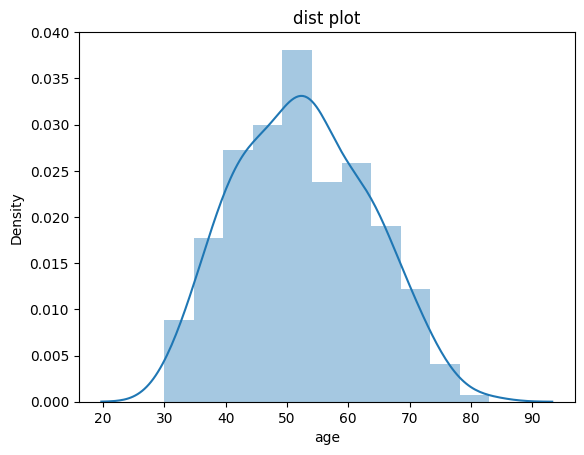

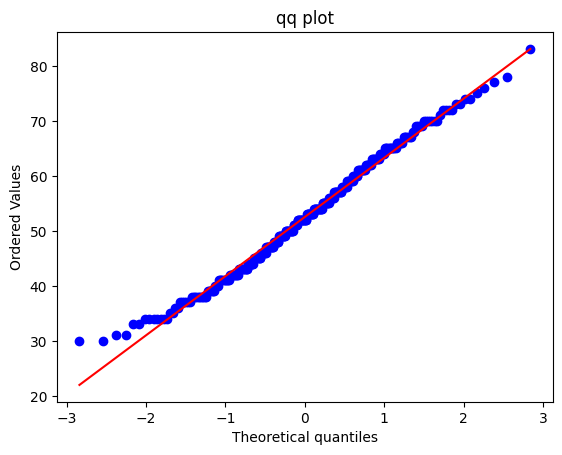

0.7761435274675819
[0.569 0.648 0.777 0.906 1.078]
Gaussian


In [19]:
#age
gaussian_check(cancer["age"])

In [20]:
# age column is gaussian

<Axes: ylabel='age'>

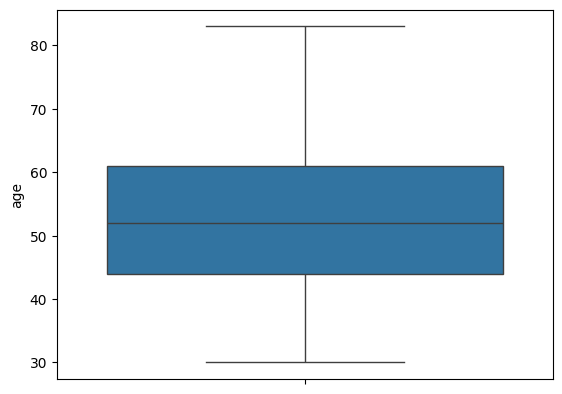

In [21]:
#checking for outliers
sns.boxplot(cancer["age"])

In [22]:
# no outliers

In [23]:
cancer["age"].unique()

array([30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83],
      dtype=int64)

In [84]:
stats.skew(cancer["age"])

0.15820314649670605

In [86]:
# the distribution is slightly right skewed

In [85]:
stats.kurtosis(cancer["age"])

-0.6053194433321694

In [88]:
# the peak is more flattened than normal distribution,fewer outliers

In [24]:
#op_year,since it contains years only so it is treated as categorical
cancer["op_year"].unique()

array([62, 65, 59, 58, 60, 66, 61, 67, 64, 63, 69, 68], dtype=int64)

In [25]:
#converting values to year format
def add(n):
    return 1900+n

In [26]:
cancer["op_year"]=cancer["op_year"].apply(add)

In [27]:
cancer

,age,op_year,Axilliary_nodes,survival
0,30,1962,3,1
1,30,1965,0,1
2,31,1959,2,1
3,31,1965,4,1
4,33,1958,10,1
...,...,...,...,...
300,75,1962,1,1
301,76,1967,0,1
302,77,1965,3,1
303,78,1965,1,2


In [28]:
cancer["op_year"].value_counts()

op_year
1958    36
1964    30
1963    30
1965    28
1960    28
1966    28
1959    27
1961    26
1967    25
1962    23
1968    13
1969    11
Name: count, dtype: int64

<Axes: xlabel='op_year', ylabel='count'>

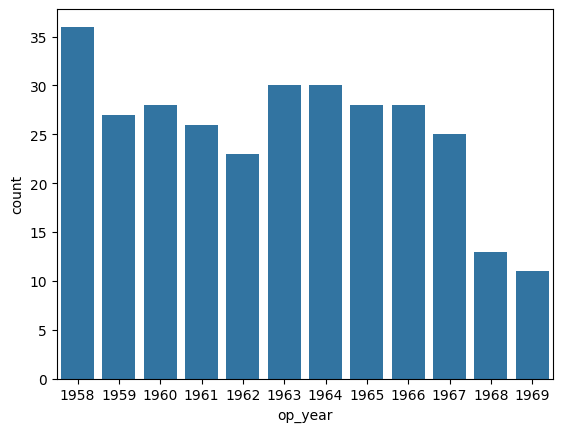

In [29]:
sns.barplot(cancer["op_year"].value_counts())

In [30]:
# most patients had operations 1958 i.e 34 and least patients had operations in 1969 i.e 11

In [31]:
#axiliary nodes
cancer["Axilliary_nodes"].unique()


array([ 3,  0,  2,  4, 10,  9, 30,  1,  7, 13,  6, 15, 21, 11,  5, 23,  8,
       20, 52, 14, 19, 16, 12, 24, 46, 18, 22, 35, 17, 25, 28],
      dtype=int64)

In [32]:
cancer["Axilliary_nodes"].value_counts()

Axilliary_nodes
0     136
1      40
3      20
2      20
4      13
7       7
6       7
8       7
9       6
5       6
13      5
14      4
11      4
22      3
19      3
23      3
15      3
10      3
20      2
12      2
21      1
52      1
30      1
16      1
24      1
46      1
18      1
35      1
17      1
25      1
28      1
Name: count, dtype: int64

In [33]:
cancer["Axilliary_nodes1"]=cancer["Axilliary_nodes"].apply(lambda x:"low" if x<10  else "medium" if x<20 else "high")

In [34]:
cancer["Axilliary_nodes1"].value_counts()

Axilliary_nodes1
low       262
medium     27
high       16
Name: count, dtype: int64

<Axes: xlabel='Axilliary_nodes', ylabel='count'>

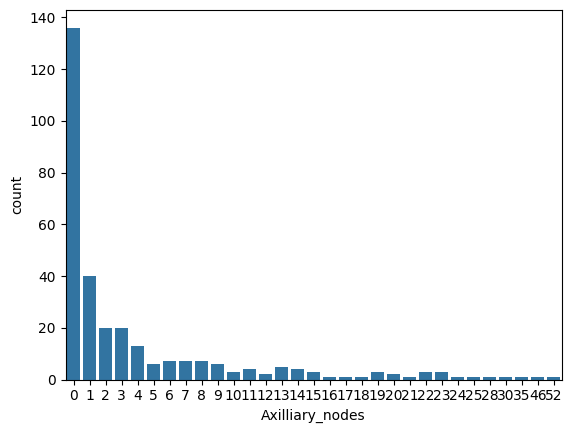

In [35]:
sns.barplot(cancer["Axilliary_nodes"].value_counts())

In [36]:
# 246 patients have low axilliary nodes,26 have medium axilliary nodes and 16 have high axilliary nodes

In [37]:
#survival/its a categorical column
cancer["survival"].value_counts()

survival
1    224
2     81
Name: count, dtype: int64

<Axes: xlabel='survival', ylabel='count'>

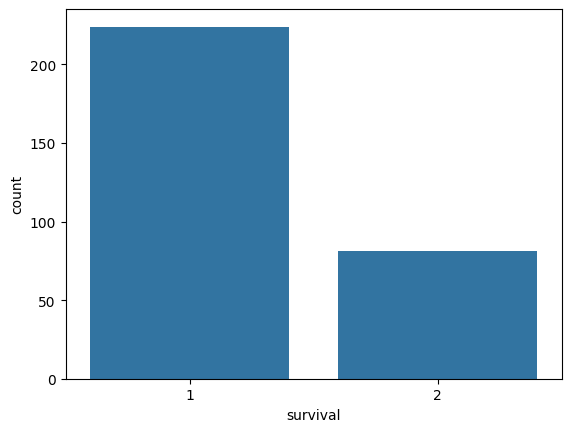

In [38]:
sns.barplot(cancer["survival"].value_counts())

In [39]:
#279 patients survived while 79 died

## Bivariate analysis

In [40]:
# checking for relationship between age and survival column

In [41]:
survived=cancer[cancer["survival"]==1]["age"]
not_survived=cancer[cancer["survival"]==2]["age"]

In [42]:
t_stats,P=stats.ttest_ind(survived,not_survived,alternative="two-sided")

In [43]:
P

0.26254798164754417

In [44]:
#since it is greater than 5% ,we can say that age is dependent on survival column

<Axes: xlabel='survival1', ylabel='age'>

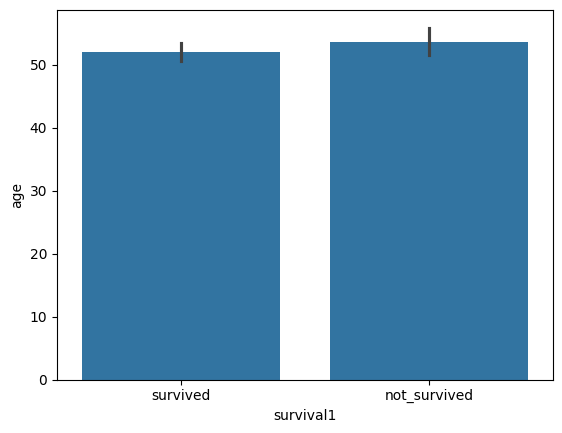

In [45]:
cancer["survival1"]=cancer["survival"].apply(lambda x:"survived" if x==1 else "not_survived")
sns.barplot(x=cancer["survival1"],y=cancer["age"])


In [46]:
# there is no significant differnce between age and survival status

In [47]:
# checking if there is any relationship between op_year and survival status

In [48]:
x=pd.crosstab(cancer["op_year"],cancer["survival"])
x

survival,1,2
op_year,,
1958,24,12
1959,18,9
1960,24,4
1961,23,3
1962,16,7
1963,22,8
1964,22,8
1965,15,13
1966,22,6


In [49]:
chi2,p,dof,expected=stats.chi2_contingency(x)

In [50]:
p

0.18584829240607026

In [51]:
#since it is greater tha 5% ,we can say that both columns are independent

<Axes: xlabel='op_year'>

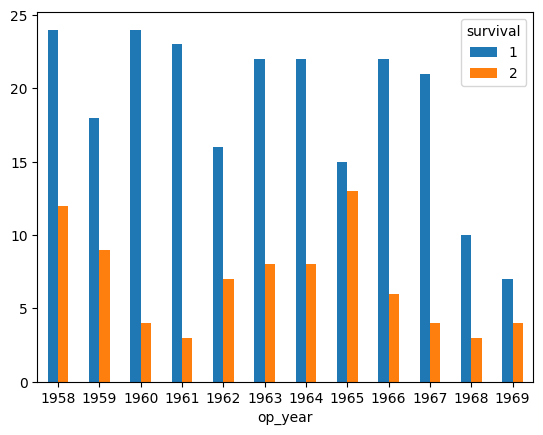

In [52]:
# bar chart for survival based on year
x.plot.bar(rot=0)

In [53]:
# checking if there is any relationship between axilliary nodes and survival status 

In [54]:
ct=pd.crosstab(cancer["Axilliary_nodes1"],cancer["survival1"])
ct

survival1,not_survived,survived
Axilliary_nodes1,,
high,9,7
low,57,205
medium,15,12


In [55]:
chi2,p,dof,expected=stats.chi2_contingency(ct)

In [56]:
p

1.6954242089721717e-05

In [57]:
# it is less than 5 percent ,null hypothesis accepted ,so we can say that they are dependent on each other

<Axes: xlabel='Axilliary_nodes1'>

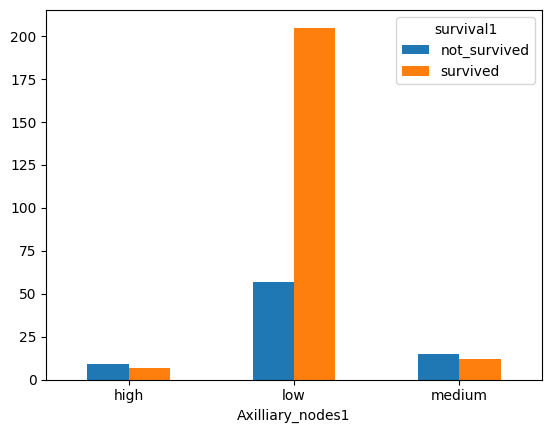

In [58]:
# bar chart of survival based on axilliary nodes
ct.plot.bar(rot=0)

In [59]:
cancer.columns

Index(['age', 'op_year', 'Axilliary_nodes', 'survival', 'Axilliary_nodes1',
       'survival1'],
      dtype='object')

In [60]:
# dropping unnecessary columns
cancer.drop(columns=["Axilliary_nodes1","survival1"],inplace=True)

## multivariate analysis

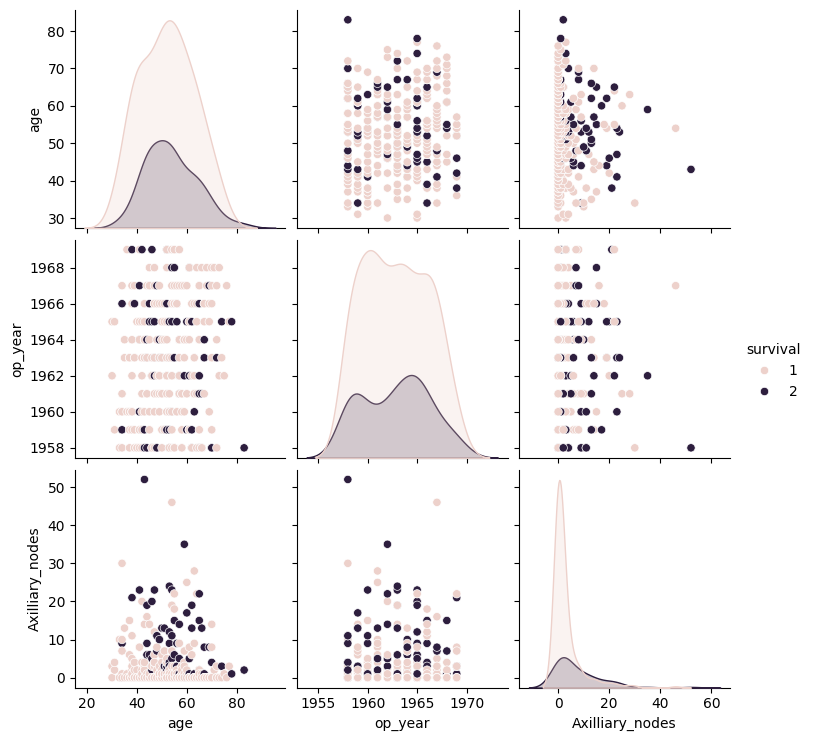

In [1007]:
sns.pairplot(data=cancer,hue="survival")

In [83]:
# the points are closer to each other for each column as compared to target column,
#so we can conclude that there is a strong relationship between the columns and target column

<Axes: >

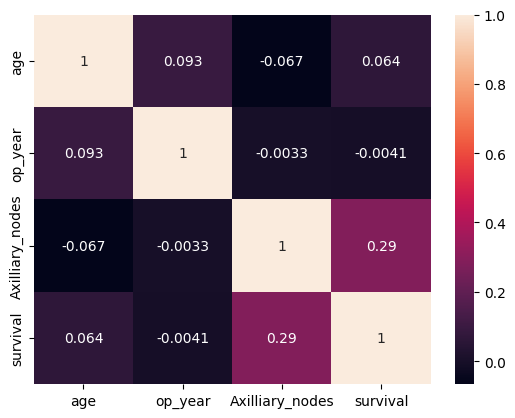

In [930]:
sns.heatmap(cancer.corr(),annot=True)

In [89]:
# some columns have positive relationship on each other while some are not

## applying knn classifier

In [61]:
target=cancer["survival"]
x1=cancer.drop(columns=["survival"])

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x1,target,test_size=0.2)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [64]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [65]:
knn.score(X_test,y_test)

0.7213114754098361

In [66]:
knn1=KNeighborsClassifier(n_neighbors=5,algorithm="brute",weights='distance')

In [67]:
knn1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', weights='distance')

In [68]:
knn1.score(X_test,y_test)

0.7213114754098361

In [78]:
knn2=KNeighborsClassifier(n_neighbors=5,algorithm="kd_tree",weights='distance')

In [70]:
knn2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=17, weights='distance')

In [71]:
knn2.score(X_test,y_test)

0.7213114754098361

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
acc=[]
hue=range(1,18)
for i in hue:
    knn3=KNeighborsClassifier(n_neighbors=i,algorithm="kd_tree",weights="distance")
    m=cross_val_score(knn3,x1,target,cv=5,scoring="accuracy")
    acc.append(np.mean(m))
print(acc)    

[0.6819672131147541, 0.6819672131147541, 0.701639344262295, 0.7114754098360655, 0.7147540983606557, 0.7245901639344261, 0.7377049180327869, 0.7311475409836066, 0.7409836065573769, 0.7245901639344263, 0.7311475409836066, 0.7377049180327868, 0.7409836065573769, 0.7442622950819672, 0.740983606557377, 0.7442622950819672, 0.7442622950819673]


In [74]:
max(acc)

0.7442622950819673

In [75]:
acc.index(max(acc))

16

In [76]:
acc[1::].index(max(acc))

15

In [77]:
# the maximum accuracy will come at position 16,so taking k value as 16

In [80]:
knn4=KNeighborsClassifier(n_neighbors=16,algorithm="kd_tree",weights='distance')

In [81]:
knn4.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=16, weights='distance')

In [82]:
knn4.score(X_test,y_test)

0.7213114754098361

In [90]:
# we conclude that there is a 75 pecent accuracy when the model is trained on training data but
# when we find accuracy on unseen data i.e cross validation,we get a 72 percent accuracy at best k value